# Problem 5 Write-up with code - - Parker Rogers

# Problem 5

In [1]:
import seaborn
import numpy as np
from matplotlib import pyplot as plt

## Part a)

In [2]:
def Moments_simulator(alpha, delta, capital_output_ratio, beta, rho, sigma_epsilon, part_a = False):
    consumption_capital_ratio = 1/capital_output_ratio - delta
    output_consumption_ratio = (1/capital_output_ratio) / consumption_capital_ratio

    gamma = 1/beta + 1 - consumption_capital_ratio*(1 - beta * (1 - delta))*(alpha - 1)

    nu_kk = (gamma - np.sqrt(gamma**2 - 4/beta))/2
    nu_kz = (output_consumption_ratio * (1-rho) + (1-beta*(1-delta))*rho)
    nu_kz /= (1/consumption_capital_ratio)*(1-rho + 1/beta - nu_kk) - (1-beta*(1-delta))*(alpha-1)

    nu_ck = (1/consumption_capital_ratio)*(1/beta - nu_kk)
    nu_cz = output_consumption_ratio- (1/consumption_capital_ratio)*nu_kz
    simulated_z_check = np.zeros(500)
    simulated_z_check[250] = 1

    simulated_c_check = np.zeros(500)
    simulated_k_check = np.zeros(500)

    simulated_I_check = np.zeros(500)
    simulated_y_check = np.zeros(500)
    simulated_w_check = np.zeros(500)
    AR_shocks = np.random.normal(loc = 0, scale = sigma_epsilon, size = 499)
    for i in xrange(499):
        simulated_z_check[i+1] += rho * simulated_z_check[i] + AR_shocks[i]
        simulated_c_check[i+1] = nu_ck * simulated_k_check[i] + nu_cz * simulated_z_check[i]
        simulated_k_check[i+1] = nu_kk * simulated_k_check[i] + nu_kz * simulated_z_check[i]
        simulated_I_check[i+1] = (simulated_k_check[i+1] - (1-delta)*simulated_k_check[i])/delta
        simulated_y_check[i+1] = simulated_z_check[i+1] + alpha * simulated_k_check[i]
        simulated_w_check[i+1] = simulated_z_check[i+1] + alpha * simulated_k_check[i]
    if part_a == True:
        print "Standard deviations for output, consumption, investment, and wages are \n{}\n{}\n{}\n{}".format(simulated_y_check[:200].std(),
                                                                                                                   simulated_c_check[:200].std(),
                                                                                                                   simulated_I_check[:200].std(),
                                                                                                                   simulated_w_check[:200].std())
    return [simulated_c_check, simulated_y_check, simulated_I_check, simulated_w_check, simulated_z_check]

In [3]:
alpha = 0.33
delta = 0.076
capital_output_ratio = 3.32
beta = 0.99

rho = 0.95
sigma_epsilon = 0.007
simulated_c_check, simulated_y_check, simulated_I_check, simulated_w_check, simulated_z_check = \
    Moments_simulator(alpha, delta, capital_output_ratio, beta, rho, sigma_epsilon, part_a = True)

Standard deviations for output, consumption, investment, and wages are 
0.0233064879441
0.0186558637263
0.0404170705243
0.0233064879441


Investment is the most volatile, which is consistent with the data. Wages should be less volatile than output, but all three are more volatile than consumption, which should be smooth, as it is in the simulation.

## Part b)

In [4]:
def Impulse_Plot(simulated_c_check, simulated_y_check, simulated_I_check, simulated_w_check, simulated_z_check):
    plt.plot(simulated_c_check, label = "consumption")
    plt.plot(simulated_y_check, label = "output")
    plt.plot(simulated_I_check, label = "investment")
    plt.plot(simulated_w_check, label = "wage")
    plt.plot(simulated_z_check, label = "technology")
    plt.legend()
    plt.title("Impulse Response Function to technology shock")
    plt.show()


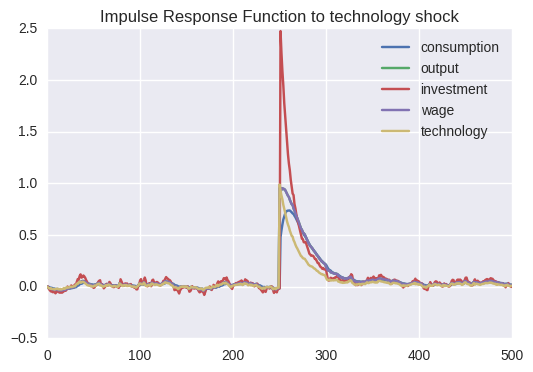

In [5]:
Impulse_Plot(simulated_c_check, simulated_y_check, simulated_I_check, simulated_w_check, simulated_z_check)

As shown by the deviations, it is expected that investment would fluctuate the most with this tech shock, and consumption would fluctuate the least. This is the case here as well, thus it mostly matches data. However, wages are not usually as volatile as output.

## Part c)

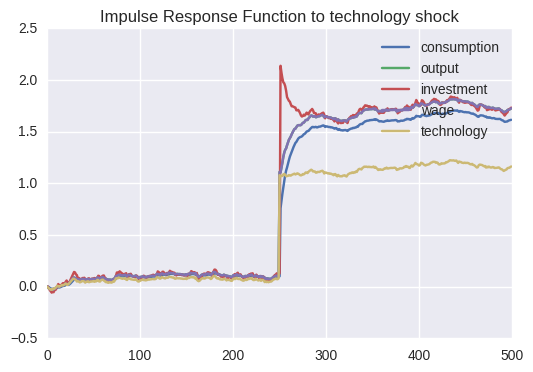

In [6]:
rho = 1
simulated_c_check, simulated_y_check, simulated_I_check, simulated_w_check, simulated_z_check =\
    Moments_simulator(alpha, delta, capital_output_ratio, beta, rho, sigma_epsilon)
Impulse_Plot(simulated_c_check, simulated_y_check, simulated_I_check, simulated_w_check, simulated_z_check)

Now that the shock is persistent, things move up and stay high.

## Part d)

Standard deviations for output, consumption, investment, and wages are 
0.0312829918227
0.0141743191883
0.0449564564975
0.0312829918227


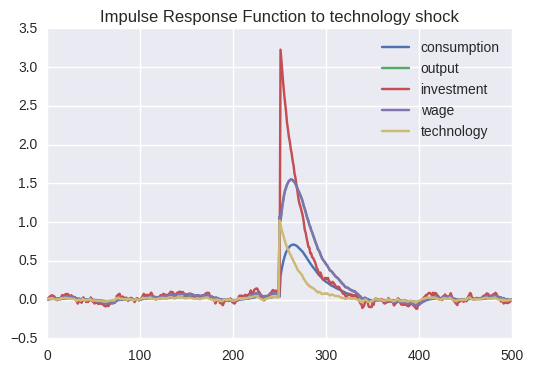

In [7]:
rho = 0.95
alpha = 2/3.
simulated_c_check, simulated_y_check, simulated_I_check, simulated_w_check, simulated_z_check =\
    Moments_simulator(alpha, delta, capital_output_ratio, beta, rho, sigma_epsilon, part_a = True)
Impulse_Plot(simulated_c_check, simulated_y_check, simulated_I_check, simulated_w_check, simulated_z_check)


Here volatility, and also responses are more dramatic for wages since marginal product of labor is lower when a technology shock hurts workers relatively more since they have a smaller share of income.

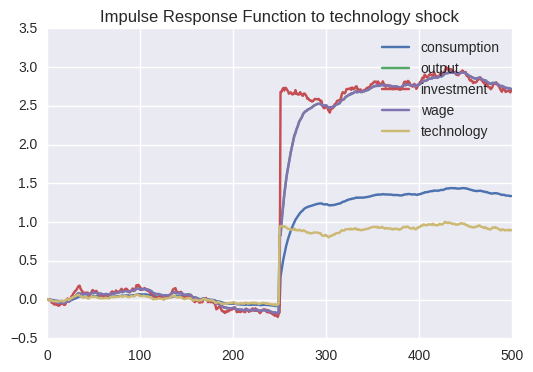

In [8]:
rho = 1
simulated_c_check, simulated_y_check, simulated_I_check, simulated_w_check, simulated_z_check =\
    Moments_simulator(alpha, delta, capital_output_ratio, beta, rho, sigma_epsilon)
Impulse_Plot(simulated_c_check, simulated_y_check, simulated_I_check, simulated_w_check, simulated_z_check)


Again, here wage ends up being much lower after the shock since workers have a smaller share of output. Things stay high after the shock because the shock is persistent.

## Part e)

You would get micro-estimates of capital share, depreciation, and discounting and you would estimate the volatility of technology over time and how persistent those shocks are over time (using AR model). Then upon plugging in these values you would want to check if the second moments, or deviations of these series match the deviations of these series in the data.